In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df=pd.read_csv("C:/Users/Shoubhit/Desktop/datasets/Admission_Predict_Ver1.1.csv")

In [4]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score

In [7]:
x=df.iloc[:,[1,2,3,4,5,6,8]]
y=df.iloc[:,7]

In [8]:
x

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit
0,337,118,4,4.5,4.5,9.65,0.92
1,324,107,4,4.0,4.5,8.87,0.76
2,316,104,3,3.0,3.5,8.00,0.72
3,322,110,3,3.5,2.5,8.67,0.80
4,314,103,2,2.0,3.0,8.21,0.65
5,330,115,5,4.5,3.0,9.34,0.90
6,321,109,3,3.0,4.0,8.20,0.75
7,308,101,2,3.0,4.0,7.90,0.68
8,302,102,1,2.0,1.5,8.00,0.50
9,323,108,3,3.5,3.0,8.60,0.45


In [9]:
y

0      1
1      1
2      1
3      1
4      0
5      1
6      1
7      0
8      0
9      0
10     1
11     1
12     1
13     1
14     1
15     0
16     0
17     1
18     0
19     0
20     1
21     0
22     1
23     1
24     1
25     1
26     0
27     1
28     0
29     0
      ..
470    1
471    0
472    1
473    0
474    1
475    0
476    0
477    0
478    1
479    1
480    1
481    1
482    1
483    0
484    1
485    1
486    0
487    0
488    1
489    0
490    1
491    0
492    1
493    1
494    1
495    1
496    1
497    1
498    0
499    0
Name: Research, Length: 500, dtype: int64

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.1, random_state=30)

In [11]:
y_train

24     1
322    0
245    1
74     0
449    0
384    1
208    0
388    0
363    0
391    0
190    1
374    0
302    1
158    0
355    0
198    0
167    0
440    0
98     1
436    1
344    0
213    1
110    0
457    0
157    0
389    1
323    0
166    0
418    0
183    0
      ..
46     1
283    1
62     1
390    0
400    0
460    1
358    0
116    0
479    1
18     0
163    0
445    1
497    1
177    0
321    1
375    0
263    1
425    1
131    0
430    1
145    1
251    0
309    0
386    0
407    1
140    1
301    0
429    1
421    1
293    1
Name: Research, Length: 450, dtype: int64

In [12]:
x_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Chance of Admit
24,336,119,5,4.0,3.5,9.80,0.97
322,314,107,2,2.5,4.0,8.27,0.72
245,328,110,4,4.0,2.5,9.02,0.81
74,314,106,3,3.0,5.0,8.90,0.74
449,315,101,3,3.5,4.5,9.13,0.79
384,340,113,4,5.0,5.0,9.74,0.96
208,305,106,2,3.0,3.0,8.16,0.64
388,296,97,2,1.5,2.0,7.80,0.49
363,306,103,2,2.5,3.0,8.36,0.69
391,318,106,3,2.0,3.0,8.65,0.71


In [13]:
LogReg=LogisticRegression()

In [14]:
LogReg.fit(x_train, y_train)


C:\Users\Shoubhit\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [15]:
y_pred=LogReg.predict(x_test)

In [16]:
accuracy_score(y_test, y_pred)

0.68

In [17]:
c=confusion_matrix(y_test, y_pred)

In [18]:
c

array([[15,  9],
       [ 7, 19]], dtype=int64)

In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.62      0.65        24
           1       0.68      0.73      0.70        26

   micro avg       0.68      0.68      0.68        50
   macro avg       0.68      0.68      0.68        50
weighted avg       0.68      0.68      0.68        50



In [21]:
cm=pd.DataFrame(c)

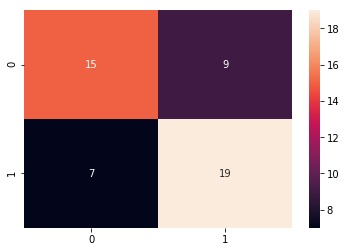

In [22]:
sns.heatmap(cm,annot=True)